# RANDOM FOREST

# LOAD THE DEPENDANCIES

## Pandas

In [242]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

## Numpy

In [243]:
import numpy as np
from numpy import set_printoptions

## Matplotlib & Seaborn

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
import graphviz

## sklearn

In [245]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.manifold import Isomap

## Math & statistics

In [246]:
from scipy import stats
from scipy.stats import norm
import math

## System

In [247]:
import os
import sys
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## notebook widgets

In [248]:
import ipywidgets as widgets
from IPython.display import Image
from IPython.display import display, Math, Latex

# FUNCTIONS

## label Encoding

In [249]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            c=list(np.unique(dataset[i]))
            return [str(x) for x in c]

## Feature Scaling

In [250]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    
    
    return X_train, X_test

## Visualization

### Plot the data space (scatter)

In [251]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    
    
#     for i in range(0,len(xx_1)):
#         print(y[i])
#         if (y[i]==0):
#             a=plt.scatter(xx_1[i],xx_2[i],marker='o',color='blue',s=30)
#         if (y[i]==1):
#             b=plt.scatter(xx_1[i],xx_2[i],marker='o',color='red',s=30)
#         if (y[i]==2):
#             c=plt.scatter(xx_1[i],xx_2[i],marker='o',color='green',s=30)
#         if (y[i]==3):
#             d=plt.scatter(xx_1[i],xx_2[i],marker='o',color='black',s=30)
        
#     plt.xlabel(f1);plt.ylabel(f2);
#     plt.legend((a,b),tuple(np.unique(labels)))

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid(b=True)
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


### Feature Distributions (histograms)

In [252]:
def feature_distributions(df,target_header,*args):
    
    data=df.drop(target_header,axis=1,inplace=False)

    num_plot_rows=len(data.columns)

    print (classes)
    
    label_encoder = preprocessing.LabelEncoder()
    df[target_header]=label_encoder.fit_transform(df[target_header])
    labels=label_encoder.classes_   #this is an array
    labels=list(labels) #converting the labels array to a list
    print (labels)

    fig = plt.figure(figsize = (20,num_plot_rows*4))
    j = 0

    ax=[]
    colors=['b','r','g','black']
    for i in data.columns:
        plt.subplot(num_plot_rows, 4, j+1)
        j += 1
        for k in range(len(labels)):
    #         print(k)
            a=sns.distplot(data[i][df[target_header]==k], color=colors[k], label = str(labels[k])+classes[k]);
            ax.append(a)
        plt.legend(loc='best')
    
    fig.suptitle(target_header+ ' Data Analysis')
    fig.tight_layout()
    # fig.subplots_adjust(top=0.95)
    plt.show()

## Preprocessing: Splitting the dataset

In [253]:
def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

## Replacing Zeros

In [254]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset

## Feature Correlations

In [255]:
def correlation_matrix(dataset,input_headers,target_header):
    
    feature_matrix=dataset[input_headers]
    corr=feature_matrix.corr()
    corr
    
    plt.figure(figsize=(10,10))
    corr_plot=sns.heatmap(corr,cmap="Reds",annot=True)
    
    corr_pair=sns.pairplot(dataset,hue=target_header[0])
    plt.show()
    
    return corr,corr_plot,corr_pair 
    

## Drop Unwanted Features

In [256]:
def feature_drop(dataset,headers_to_drop):
    
    dataset.drop(labels=headers_to_drop,axis=1,inplace=True)
    dataset.head()

## Principal Component Analysis (PCA)

In [257]:
def pca(dataset,input_headers,target_header):
    
    feature_matrix=dataset[input_headers]
    model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
    model.fit(feature_matrix)  # 3. Fit to data. Notice y is not specified!
    X_2D = model.transform(feature_matrix)         # 4. Transform the data to two dimensions


    dataset['PCA1'] = X_2D[:, 0]
    dataset['PCA2'] = X_2D[:, 1]

    sns.lmplot("PCA1", "PCA2", hue=target_header[0], data=dataset, fit_reg=False);

# MAIN PROGRAM

## Get Data

In [258]:
if __name__ == "__main__":
    
    
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/iris_/iris_data.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/titan/titantic_1.csv'
    location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
    dataset=pd.read_csv(location)
    # df=pd.read_csv('thermostat_dataset.txt',delimiter='\t')

In [259]:
    dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [260]:
    dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Drop unwanted features (columns)

In [261]:
drop_columns=['Id']
if (drop_columns!=[]):
    q1=input('Do you need to drop any columns in the dataset?')
    if (q1.lower()=='y'):
        feature_drop(dataset,drop_columns)
    

Do you need to drop any columns in the dataset?


In [262]:
# Replace zeros with the mean where needed.
rz=input('Do you need to replace any zeros in the dataset?')
if (rz.lower()=='y'):
    the_headers=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    dataset=replacing_zeros(dataset,the_headers)
    dataset.head()

Do you need to replace any zeros in the dataset?y


## Selecting inputs and targets

In [264]:
original_dataset=dataset


# target_header=['Species']
# input_headers=['Length','Width']

# target_header=['Survived']
# input_headers=['Parch','Fare']

# target_header=['play_type']
# input_headers=['score_differential','yardline_100']
# input_headers=['score_differential','game_seconds_remaining','yardline_100','qtr']

# target_header=['Species']
# input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

target_header=['Outcome']
# input_headers=['Glucose','BloodPressure']
input_headers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

target_label=label_encoding(dataset,target_header)

classes=target_label
test_label=label_encoding(dataset,input_headers)
#     print(test_label)


X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)



    


print(X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   
1            1     85.0           66.0           29.0    155.0  26.6   
2            8    183.0           64.0           29.0    155.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


## Data Visualizations

### Data space

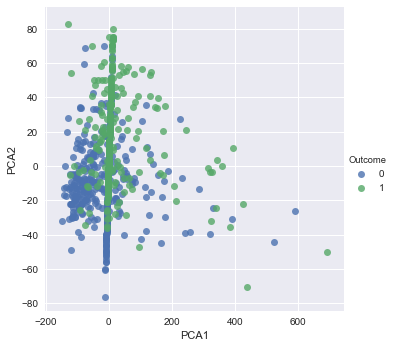

In [265]:
if (X.values.shape[1]==2):
    plot_of_data_space(dataset,X.values,y.values,input_headers)
else:
    pca(dataset,input_headers,target_header)

In [266]:
target_header[0]

'Outcome'

### Feature distributions

['0', '1']
[0, 1]


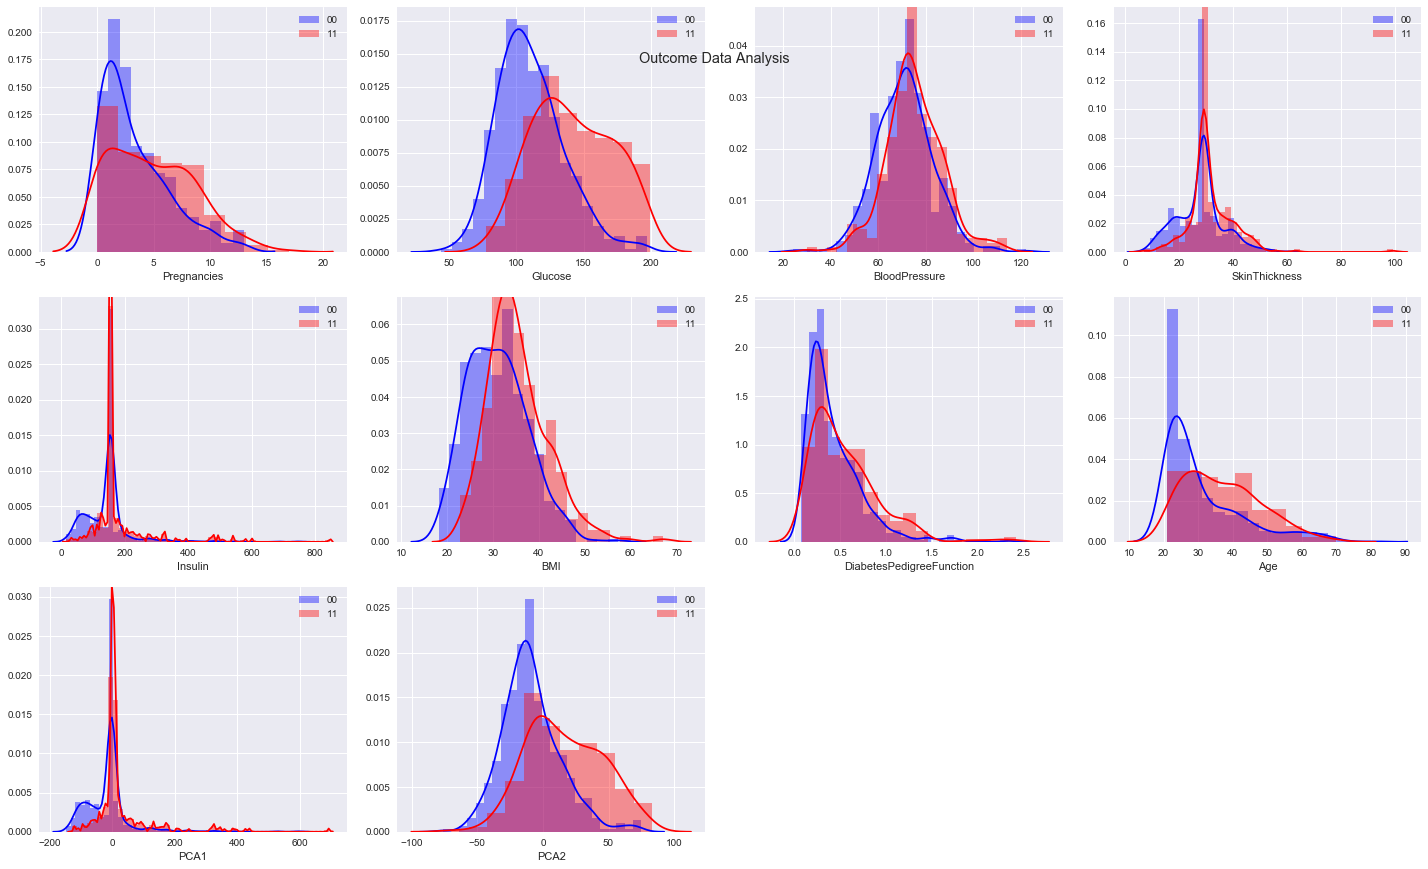

In [267]:
feature_distributions(dataset,target_header[0],classes)

In [268]:
    X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


## Correlation Matrix

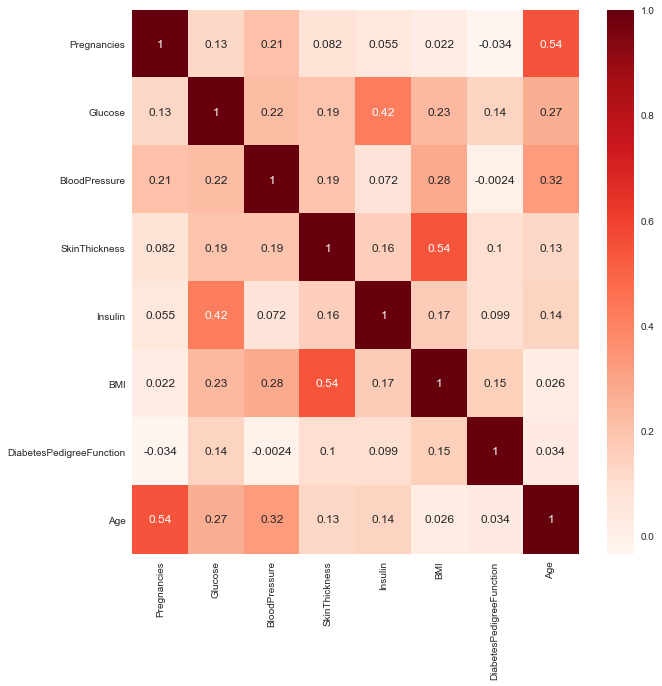

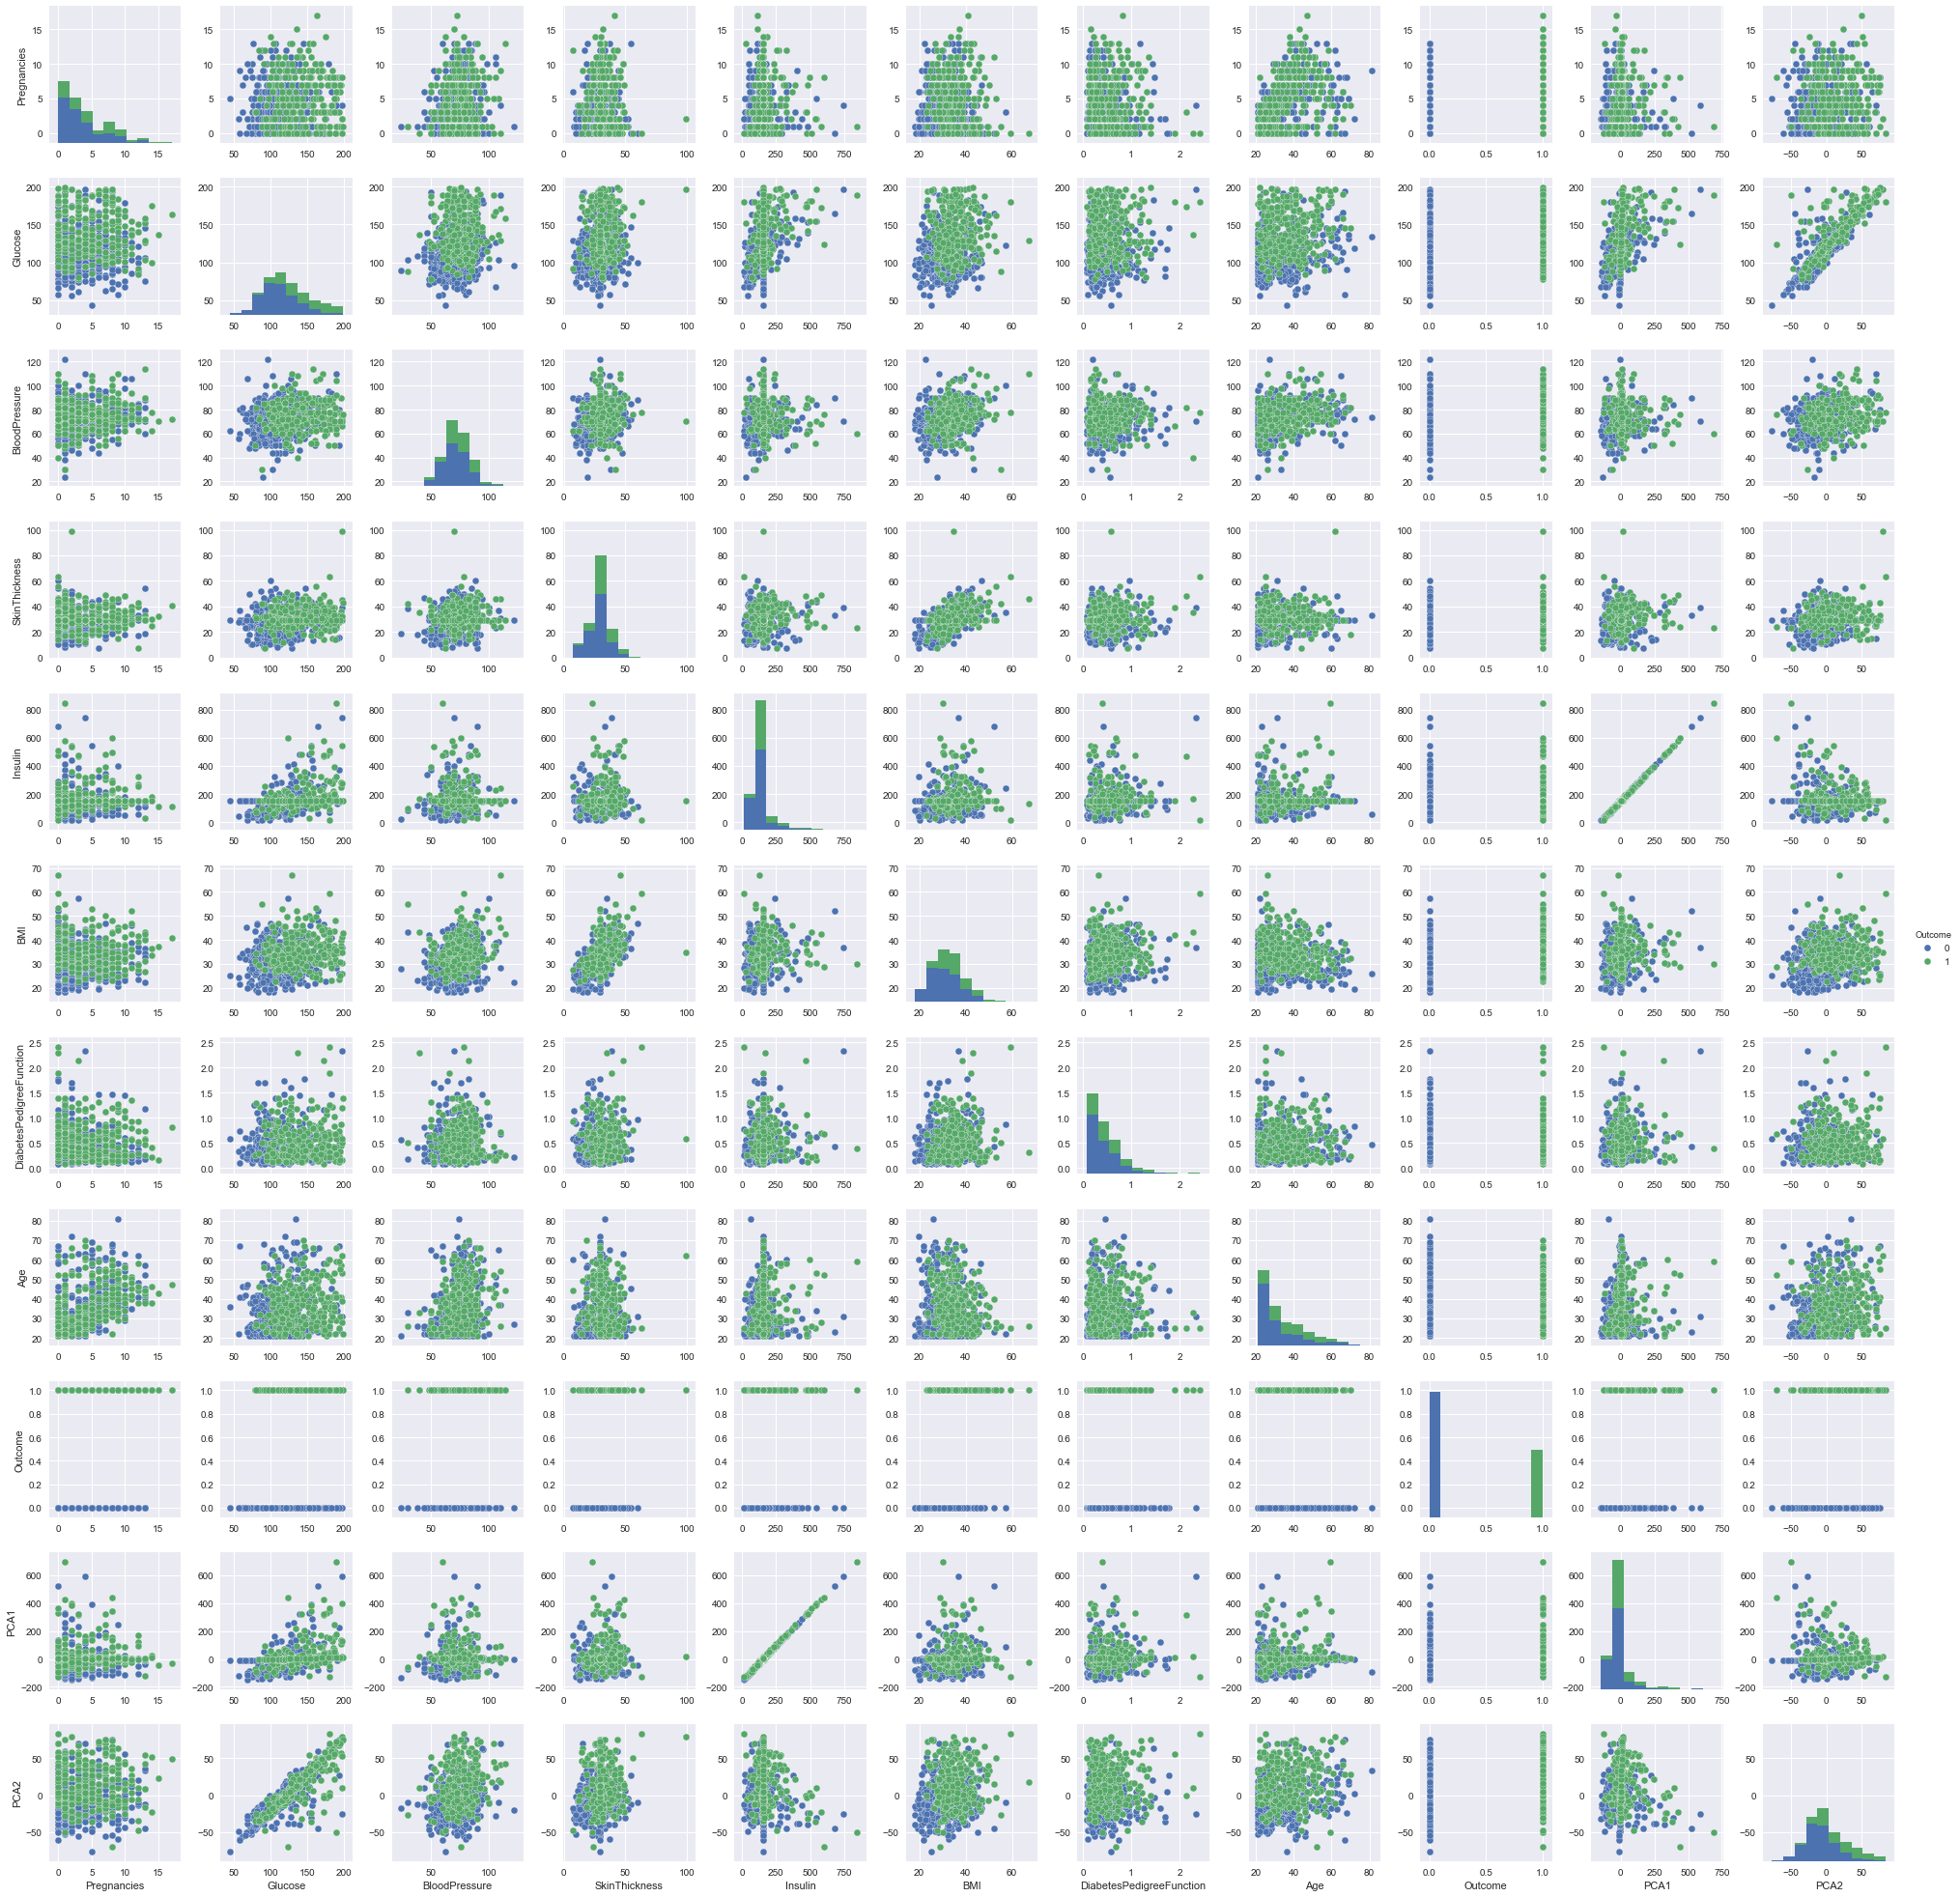

(                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
 Pregnancies                  1.000000  0.127957       0.208615       0.081770   
 Glucose                      0.127957  1.000000       0.218615       0.192677   
 BloodPressure                0.208615  0.218615       1.000000       0.191892   
 SkinThickness                0.081770  0.192677       0.191892       1.000000   
 Insulin                      0.055478  0.420301       0.072041       0.158133   
 BMI                          0.021546  0.231470       0.281132       0.543275   
 DiabetesPedigreeFunction    -0.033523  0.137100      -0.002378       0.102188   
 Age                          0.544341  0.266591       0.324915       0.126107   
 
                            Insulin       BMI  DiabetesPedigreeFunction  \
 Pregnancies               0.055478  0.021546                 -0.033523   
 Glucose                   0.420301  0.231470                  0.137100   
 BloodPressure             0.072041

In [269]:
correlation_matrix(original_dataset,input_headers,target_header)

In [ ]:
y.head()

## Splitting the Train-Test data

In [270]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20)

In [271]:
ytest.shape

(154, 1)

## Scale the data

In [272]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 6.49549587e-01  4.16634148e-01 -1.52658170e-01 -7.04880069e-01
  -3.05175281e-01  4.50129222e-01  2.11826630e-01 -3.48904466e-01]
 [-8.30864096e-01  5.83941779e-01 -2.15050080e+00 -1.16238151e+00
  -8.42532548e-01 -5.12014389e-01  5.41864776e-01 -9.54310763e-01]
 [-5.34781360e-01 -1.32336521e+00 -1.65104014e+00 -8.19255429e-01
  -4.76672281e-01 -5.40735094e-01  3.62123855e+00 -6.94850922e-01]
 [-5.34781360e-01 -1.55759589e+00 -6.52118827e-01 -5.90504709e-01
  -1.16266028e+00 -3.68410865e-01 -2.95017667e-01 -2.95801122e-03]
 [ 3.53466850e-01 -7.54519265e-01 -1.48455325e+00 -1.33003269e-01
  -8.42532548e-01  2.49084288e-01  8.51155556e-02 -2.62417853e-01]]


In [273]:
ytest.head()

,Outcome
498,1
373,0
465,0
105,0
206,1


## Random Forest Model

In [274]:
# model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
#                                min_samples_split=2, min_samples_leaf=1, 
#                                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
#                                min_impurity_decrease=0.0, min_impurity_split=None, 
#                                bootstrap=True, oob_score=False, n_jobs=None, random_state=0, 
#                                verbose=0, warm_start=False, class_weight=None)





In [275]:
model=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=None,
                             random_state=0)

### Fit model to training data

In [276]:
model.fit(Xtrain,ytrain)

C:\Users\Public\Programming\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model prediction on test data

In [277]:
y_model=model.predict(Xtest)
y_model

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [278]:
y_model_prob=model.predict_proba(Xtest)
y_model_prob[0:5]

array([[0.22, 0.78],
       [0.88, 0.12],
       [0.97, 0.03],
       [0.76, 0.24],
       [0.07, 0.93]])

### Model score & performance

In [279]:
accuracy_score(ytest,y_model)

0.7857142857142857

In [280]:
recall_score(ytest, y_model,average=None)

array([0.83838384, 0.69090909])

In [281]:
precision_score(ytest, y_model,average=None)

array([0.83     , 0.7037037])

#### Confusion Matrix

In [282]:
cm=confusion_matrix(ytest, y_model)

In [283]:
cm

array([[83, 16],
       [17, 38]], dtype=int64)

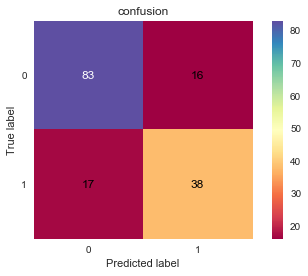

In [284]:
fig, ax = plt.subplots()
cmap=plt.cm.Spectral
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title="confusion",
       ylabel='True label',
       xlabel='Predicted label')



# Loop over data dimensions and create text annotations.
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()


plt.grid(b=None)
plt.show()

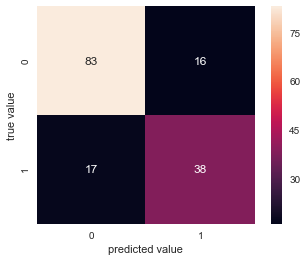

In [285]:
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

#### Cross Validation

In [286]:
y=y.values.reshape(y.size,)   # reshape y to a 1-d array
score=cross_val_score(model,X,y,cv=10)

In [287]:
score

array([0.71428571, 0.74025974, 0.76623377, 0.71428571, 0.72727273,
       0.83116883, 0.80519481, 0.85714286, 0.64473684, 0.80263158])

In [288]:
score.mean()

0.7603212576896787

C:\Users\Public\Programming\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


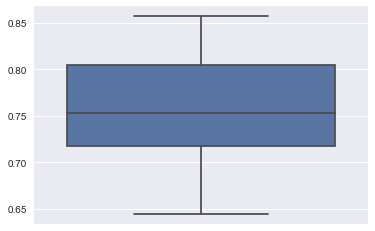

In [289]:
sns.boxplot(x=score,orient='v')
# plt.grid()
plt.show()

# EXTRA

In [290]:
# decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
# decision_tree = decision_tree.fit(Xtrain,ytrain)
# r = export_text(model, feature_names=input_headers)
# print(r)